In [9]:
from qiskit_gym.envs import LinearFunctionGym, CliffordGym, PermutationGym, LinearFunctionNoisyGym
from qiskit_gym.rl import RLSynthesis, PPOConfig, AlphaZeroConfig, BasicPolicyConfig


from qiskit import QuantumCircuit
from qiskit.transpiler import CouplingMap
import numpy as np

# Training RL

In [ ]:

cmap_6_line = CouplingMap.from_ring(6, bidirectional=True)
env = LinearFunctionNoisyGym.from_coupling_map(cmap_6_line, basis_gates=["CX", 'SWAP'])
env2 = LinearFunctionGym.from_coupling_map(cmap_6_line, basis_gates= ['CX', 'SWAP'])

noisy_rl = RLSynthesis(env, PPOConfig(), BasicPolicyConfig())
noisy_rl.learn(initial_difficulty=3, num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

noiseless_rl = RLSynthesis(env2, PPOConfig(), BasicPolicyConfig())
noiseless_rl.learn(num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

2025-12-08 11:00:19.586 | INFO     | twisterl.rl.algorithm:learn:176 - (3/0) {'successes': {'ppo_deterministic': 0.019999999552965164, 'ppo_10': 0.09000000357627869}, 'rewards': {'ppo_deterministic': -1.080957055091858, 'ppo_10': -0.44188281893730164}, 'difficulty': 3, 'success': 0.019999999552965164, 'reward': -1.080957055091858} | {'to_rust': 0.003214167, 'eval_ppo_deterministic': 0.0026895, 'eval_ppo_10': 0.025532041, 'collect': 0.025085667, 'data_to_torch': 0.047525209, 'train': 0.381419833, 'total': 0.486061958}
2025-12-08 11:00:19.599 | INFO     | twisterl.rl.algorithm:learn:196 - (3/0) Improved, saved checkpoint!
2025-12-08 11:00:19.909 | INFO     | twisterl.rl.algorithm:learn:176 - (3/1) {'successes': {'ppo_deterministic': 0.029999999329447746, 'ppo_10': 0.07000000029802322}, 'rewards': {'ppo_deterministic': -1.0033828020095825, 'ppo_10': -0.47743362188339233}, 'difficulty': 3, 'success': 0.029999999329447746, 'reward': -1.0033828020095825} | {'to_rust': 0.004137875, 'eval_ppo_

In [ ]:
noisy_rl.env.config['gateset']

# Generating Random Circuit

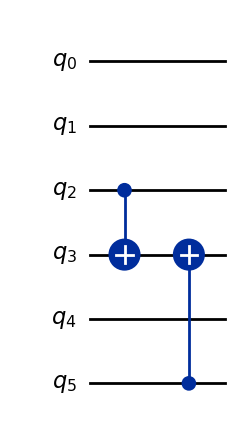

In [14]:
#generating a random quantum circuit

import random

def generate_random_circ(num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i in range(random.randrange(2, 3)):
        q1 = random.randint(0, num_qubits - 1)
        q2 = q1 + (2 * random.randint(-1, 1)) 
        if q1 == q2 :
            q2 = q1 + 1
        if  q2 >= num_qubits:
            q2 = q1 - 2
        qc.cx(q1,q2)

    return qc

qc = generate_random_circ(6)
qc.draw(fold=-1, output="mpl")


# Testing No Noise Added Prior

Noisy Synthesis


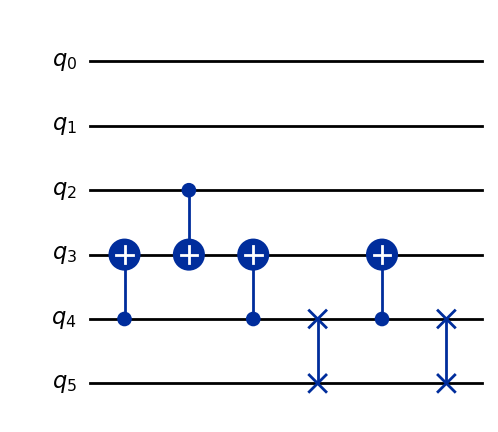

In [16]:
print('Noisy Synthesis')
qc_lf_output = noisy_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)

Noiseless Synthesis


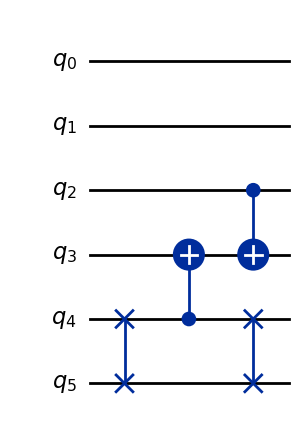

In [18]:
print('Noiseless Synthesis')
qc_lf_output = noiseless_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)

## Testing Noise Crowded on 0,1 Edge

In [ ]:
cmap_6_line = CouplingMap.from_ring(5, bidirectional=True)
env = LinearFunctionNoisyGym.from_coupling_map(cmap_6_line, basis_gates=["CX", 'SWAP'])
env2 = LinearFunctionGym.from_coupling_map(cmap_6_line, basis_gates= ['CX', 'SWAP'])

noisy_rl = RLSynthesis(env, PPOConfig(), BasicPolicyConfig())
noisy_rl.learn(initial_difficulty=3, num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

noiseless_rl = RLSynthesis(env2, PPOConfig(), BasicPolicyConfig())
noiseless_rl.learn(num_iterations=10, tb_path="runs/lf_4_line_ppo/")  # This will track progress in Tensorboard

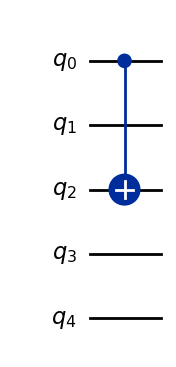

In [20]:

from qiskit.circuit.library.generalized_gates import LinearFunction
qc = QuantumCircuit(5)

qc.cx(0,2)

qc.draw(output = 'mpl')

In [ ]:
#Make sure to edit and add noise on 0,1 edge and rebuild 

print('Noisy Synthesis')
qc_lf_output = noisy_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)

In [ ]:
print('Noiseless Synthesis')
qc_lf_output = noiseless_rl.synth(qc, num_searches=10000, num_mcts_searches=0, deterministic=False)
qc_lf_output.draw(fold=-1, output ='mpl',)